In [187]:
import numpy as np
from matplotlib import pyplot as plt 
import glauber 
import time

In [255]:
Lx = 40
Ly = 40

nn_matrix=glauber.nn_indices(Lx,Ly)

Jr = glauber.nn_coupling_random(-1.,0.5,Lx,Ly)

In [260]:
nreplicas = 10
nsweeps = 8000
Ts = np.linspace(0.5,1.,5)
nTs = len(Ts)


In [261]:
spins = np.zeros((nTs,nreplicas,Lx*Ly,nsweeps))
times = np.zeros((nTs,nreplicas))

In [262]:
for i in range(nreplicas):
    initial = glauber.initialize_spins(Lx,Ly,random=True)
    for n in range(nTs):
        t0 = time.time()
        spins[n,i,:,:] = glauber.dynamics(initial,nsweeps,Jr,Ts[n],nn_matrix)
        t1 = time.time()
        times[n,i] = t1-t0
        print(f"Replica {i}, temperature {(Ts[n]):0.2f}, time: {(t1-t0):0.2f}s")
        initial = spins[n,i,:,-1]

Replica 0, temperature 0.50, time: 295.60s
Replica 0, temperature 0.62, time: 302.92s
Replica 0, temperature 0.75, time: 2102.57s
Replica 0, temperature 0.88, time: 408.96s
Replica 0, temperature 1.00, time: 406.55s
Replica 1, temperature 0.50, time: 523.87s
Replica 1, temperature 0.62, time: 554.29s
Replica 1, temperature 0.75, time: 449.29s
Replica 1, temperature 0.88, time: 420.98s
Replica 1, temperature 1.00, time: 929.60s
Replica 2, temperature 0.50, time: 6168.66s
Replica 2, temperature 0.62, time: 265.23s
Replica 2, temperature 0.75, time: 1590.42s
Replica 2, temperature 0.88, time: 9280.65s
Replica 2, temperature 1.00, time: 3592.80s
Replica 3, temperature 0.50, time: 257.86s
Replica 3, temperature 0.62, time: 240.29s
Replica 3, temperature 0.75, time: 270.01s
Replica 3, temperature 0.88, time: 239.45s
Replica 3, temperature 1.00, time: 239.90s
Replica 4, temperature 0.50, time: 237.54s
Replica 4, temperature 0.62, time: 254.72s
Replica 4, temperature 0.75, time: 228.94s
Replic

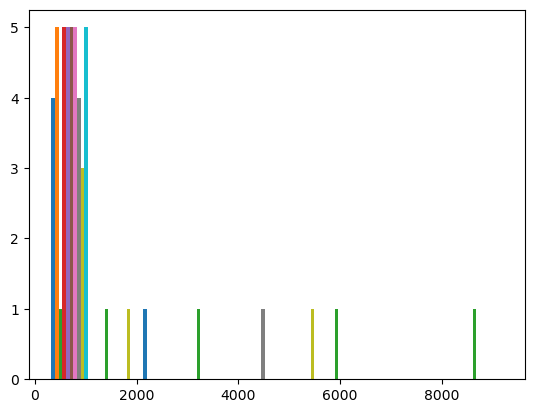

In [263]:
plt.hist(times)
plt.show()

In [265]:
magnetizations = np.mean(spins,axis=-2)

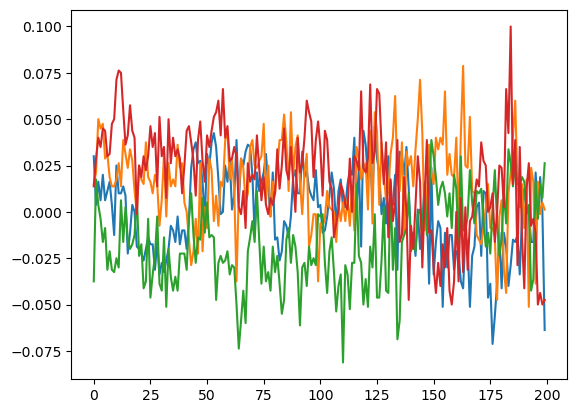

In [278]:
plt.plot(np.concatenate( [ magnetizations[i,0,0:-1:200] for i in range(nTs) ]))
plt.plot(np.concatenate( [ magnetizations[i,1,0:-1:200] for i in range(nTs) ]))
plt.plot(np.concatenate( [ magnetizations[i,2,0:-1:200] for i in range(nTs) ]))
plt.plot(np.concatenate( [ magnetizations[i,3,0:-1:200] for i in range(nTs) ]))
plt.show()

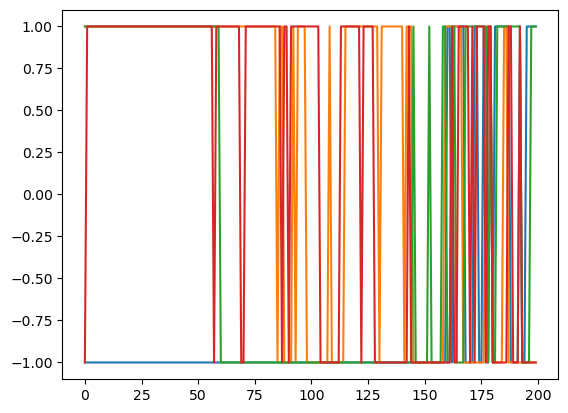

In [279]:
plt.plot(np.concatenate( [ spins[i,0,0,0:-1:200] for i in range(nTs) ]))
plt.plot(np.concatenate( [ spins[i,1,0,0:-1:200] for i in range(nTs) ]))
plt.plot(np.concatenate( [ spins[i,2,0,0:-1:200] for i in range(nTs) ]))
plt.plot(np.concatenate( [ spins[i,3,0,0:-1:200] for i in range(nTs) ]))
plt.show()

In [282]:
q = np.einsum('iart,ibrt->iabrt',spins,spins)
qea = np.mean(q,axis=-2)

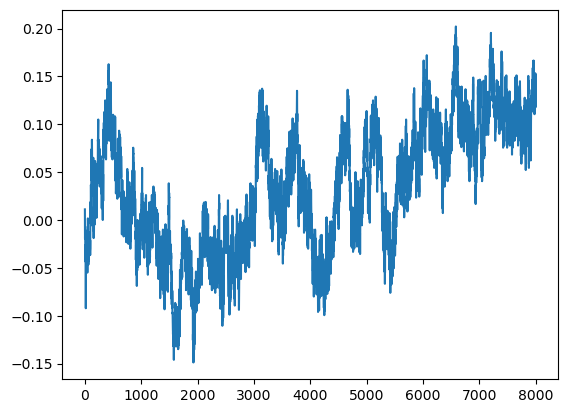

In [242]:
plt.plot(qea[0,1,:])
plt.show()

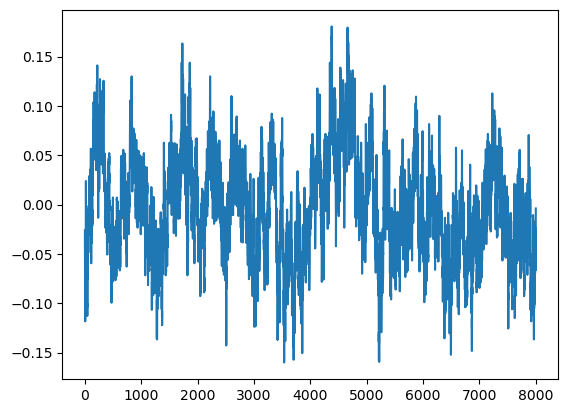

In [231]:
plt.plot(qea[0,1,:])
plt.show()

In [243]:
subset_size = 10

In [244]:
spins_subset = (spins.reshape((nreplicas,Lx,Ly,nsweeps))[:,:subset_size,:subset_size,:]).reshape((nreplicas,subset_size**2,nsweeps))

In [245]:
mag_subset = np.mean(spins_subset,axis=1)

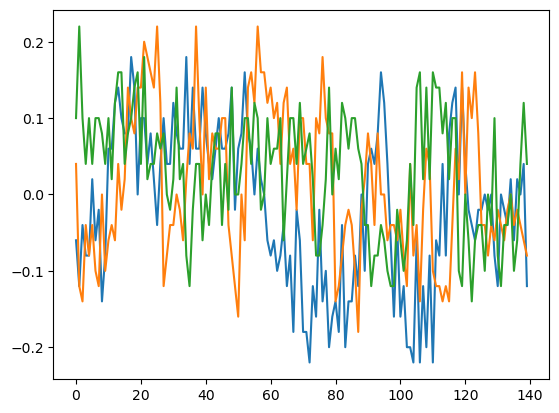

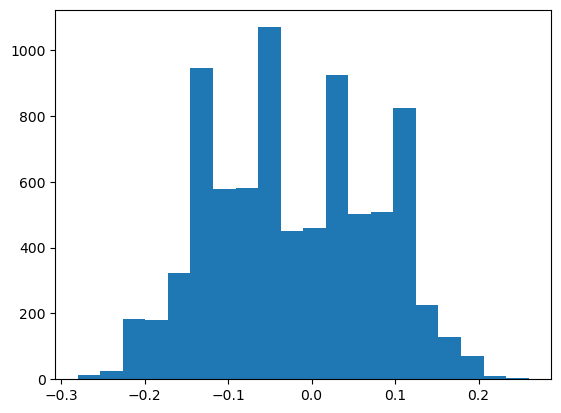

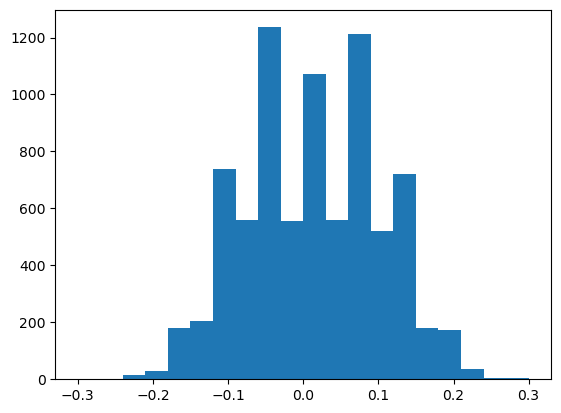

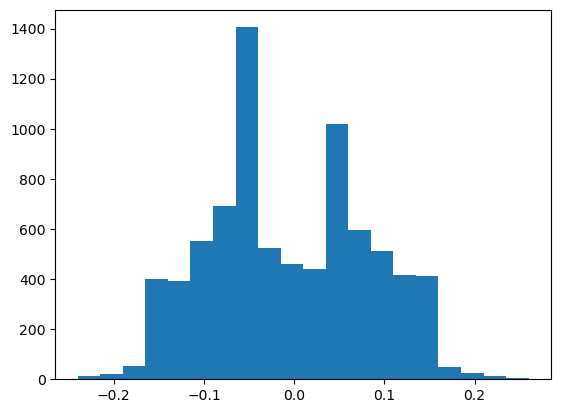

In [246]:
plt.plot(mag_subset[0,1000:-1:50])
plt.plot(mag_subset[1,1000:-1:50])
plt.plot(mag_subset[3,1000:-1:50])
plt.show()
plt.hist(mag_subset[0,:],20)
plt.show()
plt.hist(mag_subset[1,:],20)
plt.show()
plt.hist(mag_subset[2,:],20)
plt.show()

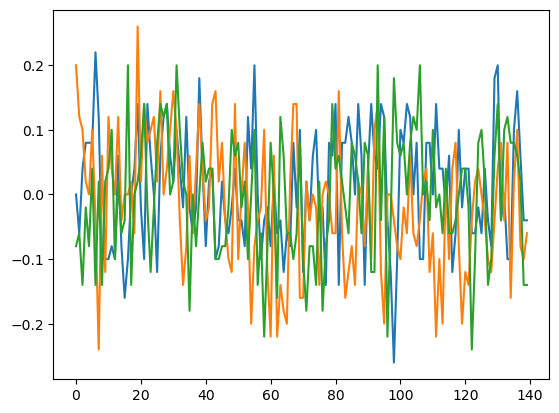

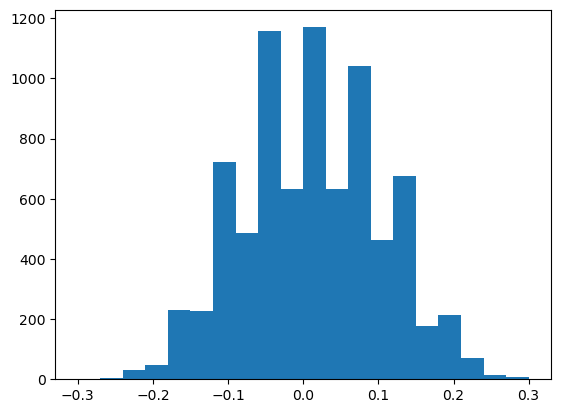

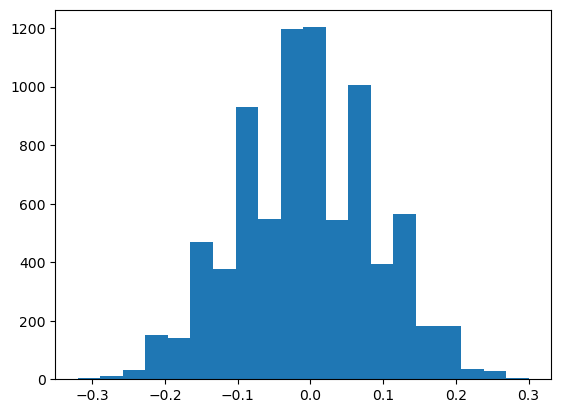

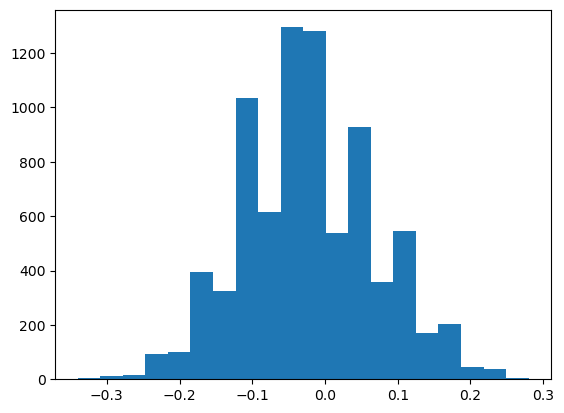

In [235]:
plt.plot(mag_subset[0,1000:-1:50])
plt.plot(mag_subset[1,1000:-1:50])
plt.plot(mag_subset[3,1000:-1:50])
plt.show()
plt.hist(mag_subset[0,:],20)
plt.show()
plt.hist(mag_subset[1,:],20)
plt.show()
plt.hist(mag_subset[2,:],20)
plt.show()

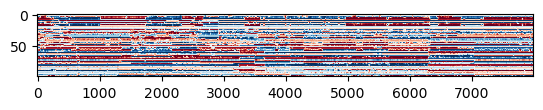

In [247]:
plt.imshow(spins_subset[1,:,:],cmap='RdBu',aspect=10)
plt.show()

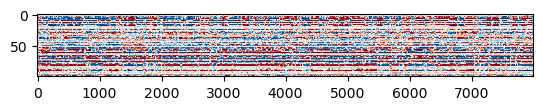

In [236]:
plt.imshow(spins_subset[1,:,:],cmap='RdBu',aspect=10)
plt.show()